---
---

# WELCOME TO PYTHON COURSE (25.09)


---
---

# Results STARTUP PLOTLY (-> 10 Uhr)

---
---

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load the data
data = {
    'EmployeeID': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'FirstName': ['John', 'Jane', 'Michael', 'Emily', 'David', 'Alice', 'Robert', 'Laura', 'James'],
    'LastName': ['Doe', 'Smith', 'Johnson', 'Williams', 'Brown', 'Davis', 'Wilson', 'Moore', 'Taylor'],
    'Role': ['Software Engineer', 'Data Scientist', 'UX Designer', 'Product Manager', 'QA Engineer', 'DevOps Engineer', 'Backend Developer', 'Frontend Developer', 'HR Manager'],
    'Department': ['Development', 'Data Science', 'Design', 'Management', 'Quality Assurance', 'Operations', 'Development', 'Development', 'Human Resources'],
    'Salary': [70000, 75000, 68000, 80000, 65000, 72000, 71000, 69000, 73000],
    'StartDate': ['2022-01-15', '2021-06-01', '2023-03-10', '2020-11-01', '2022-07-15', '2021-09-20', '2023-02-05', '2022-10-25', '2020-12-01'],
    'Project': ['Project Alpha', 'Project Beta', 'Project Gamma', 'Project Delta', 'Project Epsilon', 'Project Zeta', 'Project Alpha', 'Project Beta', 'NA'],
    'PerformanceRating': [4.5, 4.7, 4.2, 4.6, 4.1, 4.3, 4.4, 4.0, 4.8],
    'Age': [28, 32, 26, 35, 29, 31, 27, 25, 38],
    'Education': ["Bachelor's", 'PhD', "Master's", 'MBA', "Bachelor's", "Master's", "Bachelor's", "Bachelor's", "Master's"],
    'YearsOfExperience': [5, 7, 3, 10, 4, 6, 4, 2, 12],
    'Bonuses': [3500, 4000, 2800, 5000, 2500, 3200, 3000, 2200, 4500],
    'WorkHoursPerWeek': [40, 42, 38, 45, 40, 41, 40, 39, 42],
    'VacationDaysTaken': [10, 15, 8, 12, 7, 11, 9, 6, 14],
    'TrainingHours': [30, 45, 25, 40, 20, 35, 28, 22, 30],
    'TeamSize': [6, 4, 5, 8, 6, 5, 6, 5, 4],
    'ClientSatisfactionScore': [4.2, 4.5, 4.0, 4.7, 3.9, 4.3, 4.1, 3.8, 4.6]
}

df = pd.DataFrame(data)

# 1. Data Cleaning and Preprocessing
# Convert StartDate to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'])

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Handle outliers in Salary using IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Salary'] = df['Salary'].clip(lower_bound, upper_bound)

print("\nSalary range after handling outliers:")
print(df['Salary'].describe())

# 2. Data Transformation
# Create a new column 'TenureYears'
df['TenureYears'] = (pd.Timestamp.now() - df['StartDate']).astype('<m8[Y]')

# Scale Salary and Bonuses using pandas
df['Salary_Scaled'] = (df['Salary'] - df['Salary'].min()) / (df['Salary'].max() - df['Salary'].min())
df['Bonuses_Scaled'] = (df['Bonuses'] - df['Bonuses'].min()) / (df['Bonuses'].max() - df['Bonuses'].min())

print("New columns added: TenureYears, Salary_Scaled, Bonuses_Scaled")
print(df[['TenureYears', 'Salary_Scaled', 'Bonuses_Scaled']].head())

# 3. Filtering and Sub-setting
# Subset of employees in Development department
dev_employees = df[df['Department'] == 'Development']
print("Employees in Development department:")
print(dev_employees[['FirstName', 'LastName', 'Role']])

# Filter employees with above-average performance
above_avg_performance = df[df['PerformanceRating'] > df['PerformanceRating'].mean()]
print("\nEmployees with above-average performance:")
print(above_avg_performance[['FirstName', 'LastName', 'PerformanceRating']])

# 4. Data Aggregation
# Average salary by department
avg_salary_by_dept = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print("Average salary by department:")
print(avg_salary_by_dept)

# Performance rating statistics by role
perf_stats_by_role = df.groupby('Role')['PerformanceRating'].agg(['mean', 'min', 'max'])
print("\nPerformance rating statistics by role:")
print(perf_stats_by_role)

# 5. Data Joining and Mergin
# Create a separate DataFrame with department budget info
dept_budget = pd.DataFrame({
    'Department': ['Development', 'Data Science', 'Design', 'Management', 'Quality Assurance', 'Operations', 'Human Resources'],
    'Budget': [500000, 400000, 300000, 450000, 250000, 350000, 200000]
})

# Merge with the main DataFrame
df_with_budget = pd.merge(df, dept_budget, on='Department', how='left')
print("Merged DataFrame with department budget:")
print(df_with_budget[['FirstName', 'LastName', 'Department', 'Salary', 'Budget']].head())

# 6. Pivoting and Reshaping
# Pivot table: Average performance rating for each role in each department
pivot_perf = pd.pivot_table(df, values='PerformanceRating', index='Department', columns='Role', aggfunc='mean')
print("Pivot table - Average performance rating by role and department:")
print(pivot_perf)

# 7. Data Imputation (for demonstration, let's assume some missing values in TrainingHours)
# Introduce some missing values in TrainingHours
df.loc[df.sample(n=3).index, 'TrainingHours'] = None

# Impute missing values with mean using pandas
df['TrainingHours'] = df['TrainingHours'].fillna(df['TrainingHours'].mean())
print("TrainingHours after imputation:")
print(df['TrainingHours'])

# 8. Data Visualization with Plotly
# Scatter plot: Years of Experience vs Salary
fig1 = px.scatter(df, x='YearsOfExperience', y='Salary', color='Department', 
                   title='Years of Experience vs Salary',
                   labels={'YearsOfExperience': 'Years of Experience', 'Salary': 'Salary'})
fig1.show()

# Bar plot: Average Performance Rating by Department
avg_perf_by_dept = df.groupby('Department')['PerformanceRating'].mean().reset_index()
fig2 = px.bar(avg_perf_by_dept, x='Department', y='PerformanceRating',
               title='Average Performance Rating by Department',
               labels={'PerformanceRating': 'Average Performance Rating'})
fig2.show()

# Heatmap: Correlation matrix
corr_matrix = df.select_dtypes(include=[int, float]).corr()
fig3 = px.imshow(corr_matrix, title='Correlation Heatmap', 
                  labels=dict(x='Features', y='Features', color='Correlation'),
                  color_continuous_scale='RdBu')
fig3.show()

# 9. Summary Statistics
print("\nSummary Statistics")
print(df.describe())

print("\nAnalysis complete. Check the generated visualizations.")


---
---

# TEST PLOTLY (10.15 -> 11 Uhr) 

---

1. **How can you create a 3D surface plot in Plotly using Python?**
   - a) `go.Surface()`
   - b) `px.surface()`
   - c) `go.Scatter3d()`
   - d) `ff.surface()`

2. **In Plotly, how do you specify a custom color scale for a heatmap?**
   - a) `fig.update_layout(coloraxis_colorbar=dict(colorscale=...))`
   - b) `fig.update_traces(colorscale=...)`
   - c) `fig.update_layout(colorway=[...])`
   - d) `px.heatmap(colorscale=...)`

3. **Which method is used to combine multiple figures into one subplot grid in Plotly?**
   - a) `make_subplots()`
   - b) `combine_figures()`
   - c) `merge_plots()`
   - d) `px.subplots()`

4. **How can you add annotations (e.g., text labels) to specific points on a Plotly scatter plot?**
   - a) `fig.add_annotation()`
   - b) `fig.add_text()`
   - c) `fig.add_traces(annotations=...)`
   - d) `px.scatter(labels=...)`

5. **How do you define a secondary Y-axis on a Plotly graph (i.e., having two y-axes)?**
   - a) `fig.update_layout(yaxis2=dict(...), secondary_y=True)`
   - b) `fig.update_layout(yaxis=dict(..., side='right'))`
   - c) `fig.add_yaxis(secondary_y=True)`
   - d) `fig.update_traces(secondary_y=True)`

6. **In Plotly, which function would you use to display histograms of multiple data sets in a stacked fashion?**
   - a) `px.histogram()` with `barmode='stack'`
   - b) `go.HistogramStack()`
   - c) `px.histogram()` with `stacked=True`
   - d) `ff.create_stacked_histogram()`

7. **What is the correct way to update only the markers in a Plotly scatter plot without changing any other aspects of the plot?**
   - a) `fig.update_traces(marker=dict(...))`
   - b) `fig.update_layout(marker=dict(...))`
   - c) `fig.update_markers({...})`
   - d) `px.scatter(marker=dict(...))`

8. **How do you disable Plotly's default legend for a specific trace in a figure?**
   - a) `fig.update_traces(showlegend=False)`
   - b) `fig.add_trace(showlegend=False)`
   - c) `fig.update_layout(showlegend=False)`
   - d) `px.scatter(showlegend=False)`

9. **Which of the following is the correct way to create a violin plot in Plotly to visualize the distribution of a dataset?**
   - a) `px.violin()`
   - b) `go.Box()`
   - c) `go.Violin()`
   - d) `px.boxplot()`

10. **How do you create a funnel chart in Plotly?**
    - a) `px.funnel()`
    - b) `go.Funnel()`
    - c) `ff.create_funnel()`
    - d) `go.Bar(funnel=True)`


11. **Which Plotly function would you use to plot a dendrogram?**
    - a) `ff.create_dendrogram()`
    - b) `px.dendrogram()`
    - c) `go.Dendrogram()`
    - d) `px.cluster_dendrogram()`

12. **How do you add custom hover labels to a Plotly chart?**
    - a) `fig.update_traces(hovertemplate=...)`
    - b) `fig.add_traces(hovertext=...)`
    - c) `fig.update_layout(hovertext=...)`
    - d) `px.scatter(hoverlabels=...)`

13. **What is the correct method to update the axis tick format to a percentage in Plotly?**
    - a) `fig.update_layout(yaxis_tickformat='%')`
    - b) `fig.update_layout(tickformat='%')`
    - c) `fig.update_traces(yaxis_tickformat='%')`
    - d) `px.scatter(tickformat='%')`

14. **How do you create a ternary plot in Plotly?**
    - a) `px.scatter_ternary()`
    - b) `go.Ternary()`
    - c) `go.Scatterternary()`
    - d) `px.ternary()`

15. **How do you display error bars on both the X and Y axes of a Plotly scatter plot?**
    - a) `go.Scatter(x=x, y=y, error_x=dict(...), error_y=dict(...))`
    - b) `go.Scatter(error=dict(x=..., y=...))`
    - c) `px.scatter(error_x=..., error_y=...)`
    - d) `fig.add_trace(error_x=..., error_y=...)`





# NUMPY (-> 11.15)

---

NumPy (Numerical Python) is a fundamental library for numerical computations in Python. It provides support for arrays, matrices, and a wide range of mathematical functions that operate on these data structures. NumPy is particularly important for scientific computing, data analysis, and machine learning in Python.

### **3. Key Features**

#### **3.1. Arrays**

The core of NumPy is the `ndarray` object, which represents an N-dimensional array. 

- **Creating Arrays:** NumPy allows the creation of arrays using various methods, including arrays from lists, arrays of zeros or ones, and arrays with values within a specified range.

- **Array Attributes:** Arrays have attributes like shape (the number of dimensions and the size of each dimension), size (the total number of elements), datatype (the type of elements), and number of dimensions.

#### **3.2. Array Operations**

- **Element-wise Operations:** NumPy enables operations such as addition, subtraction, and multiplication on each element of an array. These operations are efficient and are performed element-wise.

- **Mathematical Functions:** Many mathematical functions are available, such as square roots, means, and standard deviations, which can be applied to the array elements.

- **Matrix Operations:** NumPy provides functions for matrix operations, including calculating dot products and transposing matrices.

#### **3.3. Indexing and Slicing**

- **Accessing Elements:** Elements in an array can be accessed through indexing. This applies to both one-dimensional and multi-dimensional arrays.

- **Slicing:** Arrays can be sliced into sub-arrays using slicing methods. This allows access to specific sections of the array.

#### **3.4. Reshaping Arrays**

- **Reshaping:** Arrays can be reshaped into different forms without changing the data. This is commonly used to adjust the dimensions of an array.

- **Flattening:** Arrays can be "flattened" into one-dimensional arrays, a useful method to simplify data structures.

### **4. Useful Functions**

- **Creating Arrays:** There are functions for creating arrays filled with zeros, ones, or identity matrices.

- **Statistical Functions:** NumPy provides functions to calculate the minimum, maximum, and sum of array elements.

- **Linear Algebra:** For linear algebra operations, functions are available to compute the inverse of matrices, as well as eigenvalues and eigenvectors.

### **5. Broadcasting**

Broadcasting is a powerful feature in NumPy that allows element-wise operations on arrays of different shapes. It enables smaller arrays to be "broadcast" over larger arrays to perform operations.

### **6. Random Module**

The `numpy.random` module contains functions for generating random numbers and random sampling. It can generate random numbers from various distributions and draw random samples from arrays.

### **7. Resources**



---
---
https://numpy.org/
https://numpy.org/doc/stable/user/absolute_beginners.html
https://numpy.org/doc/stable/user/basics.broadcasting.html
https://numpy.org/doc/stable/reference/routines.linalg.html


NumPy is often used in conjunction with other popular Python libraries such as SciPy, Pandas, and Matplotlib to perform various tasks, including:

- **Numerical computations**: NumPy provides an efficient and flexible way to perform numerical computations, including basic arithmetic operations, linear algebra operations, and random number generation.
- **Data analysis**: NumPy is widely used for data analysis, including data cleaning, filtering, and grouping.
- **Scientific simulations**: NumPy is used to simulate complex scientific phenomena, such as fluid dynamics, signal processing, and image processing.
- **Machine learning**: NumPy is used as a foundation for many machine learning libraries, including Scikit-learn and TensorFlow.

Some of the key features of NumPy include:

- **Multi-dimensional arrays**: NumPy provides support for large, multi-dimensional arrays and matrices.
- **Vectorized operations**: NumPy allows you to perform operations on entire arrays at once, making it much faster than working with Python lists.
- **Broadcasting**: NumPy allows you to perform operations on arrays with different shapes and sizes.
- **Indexing and slicing**: NumPy provides flexible indexing and slicing capabilities, making it easy to access and manipulate specific parts of an array.


### **Key Features of NumPy**:
1. **N-Dimensional Arrays**: 
   - Supports the creation and manipulation of multi-dimensional arrays (1D, 2D, 3D, etc.).
   - Efficiently stores large datasets, enabling fast operations on array elements.

2. **Mathematical Functions**:
   - A rich set of built-in mathematical functions for element-wise computations (e.g., addition, multiplication) and statistical analysis (e.g., mean, standard deviation).

3. **Broadcasting**:
   - Allows arithmetic operations between arrays of different shapes, by virtually replicating smaller arrays without the need for copying data.
   - Simplifies operations between mismatched arrays, like a matrix and a vector.

4. **Linear Algebra Support**:
   - Provides functions for matrix operations like matrix multiplication, determinant calculation, eigenvalues, and more.
   - Essential for scientific computing and machine learning.

5. **Random Number Generation**:
   - Tools for generating random numbers, sampling, and probability distributions.
   - Used in simulations, data analysis, and machine learning models.

6. **Integration with Other Libraries**:
   - **Interoperable with Pandas, SciPy, TensorFlow, and more.**
   - Used extensively in data science, machine learning, scientific simulations, and AI development.

7. **Efficiency & Speed**:
   - Written in C, making it much faster than native Python for array operations.
   - Supports **vectorization**, which allows operations to be applied simultaneously across all elements of an array, avoiding loops.

### **Common Use Cases**:
- **Data Analysis**: Process and manipulate large datasets.
- **Machine Learning**: Efficient array manipulation for training models.
- **Scientific Computing**: Perform high-precision calculations in fields like physics, engineering, and finance.
- **Image Processing**: Handle image data stored as arrays.

![Pasted image 20240919144752.png](<attachment:Pasted image 20240919144752.png>)
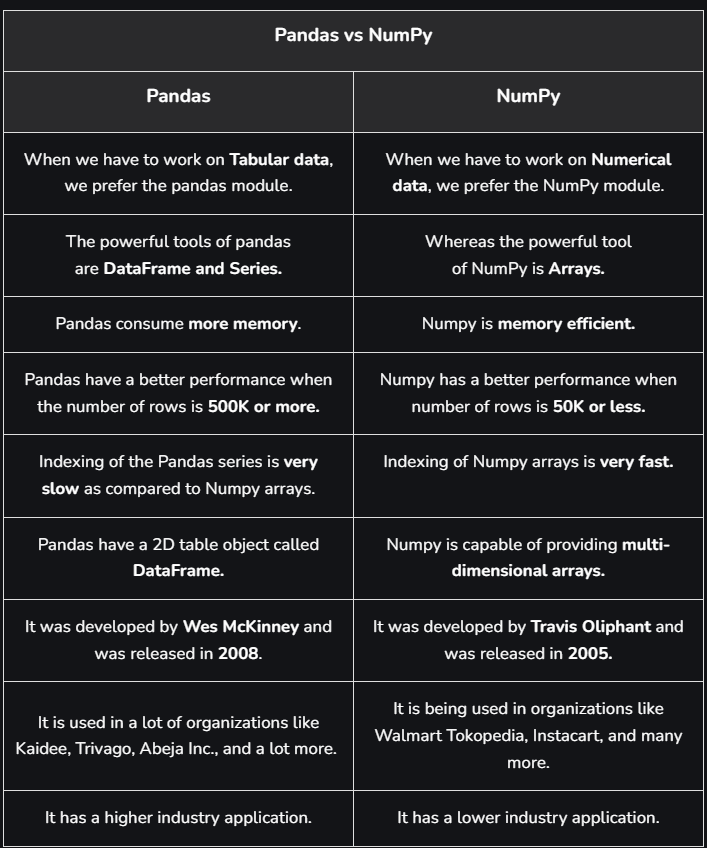

---
---

# PREVIEW NUMPY (-> 12Uhr)

---
### 0. Generate Data with NumPy
'Product'
'Sales'
'Revenue'
'Customer_Age'
'Customer_Region'
'Marketing_Spend'
'Customer_Satisfaction'

### **1. N-Dimensional Arrays:**
   - **Task 1**: Create a 2D array representing a 5x5 grid and fill it with random integers between 1 and 100.
   - **Task 2**: Reshape a 1D array of size 9 into a 3x3 matrix.
   - **Task 3**: Create a 3D array and access a specific element using multi-dimensional indexing.

### **2. Mathematical Functions:**
   - **Task 4**: Create an array of numbers from 0 to 10. Apply mathematical functions like square root, exponential, and sine on the array.
   - **Task 5**: Compute the mean, median, and standard deviation of an array containing a dataset of 100 random numbers.
   - **Task 6**: Perform element-wise multiplication and addition between two arrays of the same shape.

### **3. Broadcasting:**
   - **Task 7**: Create a 3x3 matrix and add a 1D array of size 3 to it using broadcasting.
   - **Task 8**: Multiply a 4x1 matrix by a 1x4 matrix using broadcasting to create a 4x4 matrix.
   - **Task 9**: Use broadcasting to subtract the mean from each column of a 2D array.

### **4. Linear Algebra Support:**
   - **Task 10**: Create two 3x3 matrices and compute their matrix product.
   - **Task 11**: Calculate the determinant and inverse of a 3x3 matrix.
   - **Task 12**: Solve a system of linear equations using NumPy’s linear algebra functions.
   - **Task 13**: Compute the eigenvalues and eigenvectors of a matrix.

### **5. Random Number Generation:**
   - **Task 14**: Generate an array of 10 random integers between 50 and 100.
   - **Task 15**: Simulate rolling a dice 100 times using the NumPy random module.
   - **Task 16**: Create an array of 1000 random numbers from a normal distribution (mean = 0, std dev = 1) and visualize the data using a histogram.
   - **Task 17**: Shuffle the elements of an array randomly and select a random sample of 5 elements.

### **6. Integration with Other Libraries:**
   - **Task 18**: Create a Pandas DataFrame using a NumPy array and perform basic operations like filtering, grouping, and aggregation on the DataFrame.
   - **Task 19**: Use NumPy arrays to plot data using Matplotlib. Create a line chart and a scatter plot.

### **7. Efficiency & Speed:**
   - **Task 21**: Compare the performance of summing a list of 1,000,000 numbers using a Python loop vs. using a NumPy array and `np.sum()`.
   - **Task 22**: Write a Python loop to perform element-wise operations on a list and then replace the loop with vectorized NumPy operations. Measure the speed difference.

---

### **Use Case-Specific Tasks:**

### **Data Analysis**:
   - **Task 24**: Filter an array to extract only the values greater than a specific threshold.
   - **Task 25**: Group the data based on a condition (e.g., values greater than a specific mean) and compute aggregate statistics for each group.

### **Machine Learning**:
   - **Task 26**: Create a NumPy array representing a dataset of features (e.g., 100 rows and 5 columns). Normalize the data by subtracting the mean and dividing by the standard deviation.
   - **Task 27**: Generate a random dataset and split it into training and testing sets using NumPy.
   - **Task 28**: Use NumPy to implement a simple linear regression by computing the slope and intercept.

### **Scientific Computing**:
   - **Task 29**: Simulate the motion of a projectile by creating a NumPy array for time and computing the height and distance using basic physics formulas.
   - **Task 31**: Generate a signal with a sine wave and compute its Fourier transform using NumPy.

### **Image Processing**:
   - **Task 33**: Create a 2D array representing pixel values of a grayscale image and apply a Gaussian filter to smooth the image.

---
---


---
---

# TODAYS TASKS: FINISH THE REST OF THE TASKS FROM ABOVE LIST
